In [153]:
import pandas as pd
df = pd.read_csv('train.csv')

## Loading data

In [154]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [155]:
df[["Age", "RoomService", "VIP", "FoodCourt", "ShoppingMall", "VRDeck", "CryoSleep"]].corr()

,Age,RoomService,VIP,FoodCourt,ShoppingMall,VRDeck,CryoSleep
Age,1.000000,0.068723,0.092819,0.130421,0.033133,0.101007,-0.074273
RoomService,0.068723,1.000000,0.058785,-0.015889,0.054480,-0.019581,-0.252396
VIP,0.092819,0.058785,1.000000,0.129799,0.018295,0.125974,-0.081402
FoodCourt,0.130421,-0.015889,0.129799,1.000000,-0.014228,0.227995,-0.211510
ShoppingMall,0.033133,0.054480,0.018295,-0.014228,1.000000,-0.007322,-0.212514
VRDeck,0.101007,-0.019581,0.125974,0.227995,-0.007322,1.000000,-0.198857
CryoSleep,-0.074273,-0.252396,-0.081402,-0.211510,-0.212514,-0.198857,1.000000


In [156]:
#import seaborn as sns
#sns.pairplot(df[["Age", "RoomService", "VIP", "FoodCourt", "ShoppingMall", "VRDeck", "CryoSleep", "Transported"]], hue= 'Transported')

- Guaranteed transportation above certain VRDeck spending (outlier?)


To do:
- Split cabin data
- Clean up cabin data

- Change destination from str for: HomePlanet, CryoSleep, Destination, 
- Standardize info for: Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck

In [157]:
df.dropna(inplace=True)

In [158]:
from sklearn.preprocessing import StandardScaler, LabelBinarizer

In [159]:
# Assuming df is your dataframe and 'Cabin' is the column you want to split
df[['Cabin_1', 'Cabin_2', 'Cabin_3']] = df['Cabin'].str.split('/', expand=True)

# Display the dataframe to check the result
print(df)

     PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa 

In [160]:
std_scaler = StandardScaler()
 
df_scaled = std_scaler.fit_transform(df[["Age", "RoomService", "FoodCourt", "ShoppingMall", "VRDeck", "Cabin_2"]].to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=["Age", "RoomService", "FoodCourt", "ShoppingMall", "VRDeck", "Cabin_2"])

df_scaled.head()

,Age,RoomService,FoodCourt,ShoppingMall,VRDeck,Cabin_2
0,0.695413,-0.345756,-0.285355,-0.309494,-0.269534,-1.167051
1,-0.336769,-0.176748,-0.279993,-0.266112,-0.230494,-1.167051
2,2.002842,-0.279083,1.845163,-0.309494,-0.226058,-1.167051
3,0.282540,-0.345756,0.479034,0.334285,-0.098291,-1.167051
4,-0.887266,0.124056,-0.243650,-0.047470,-0.267759,-1.165103


In [161]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_1,Cabin_2,Cabin_3
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S


In [162]:
#HomePlanet, Destination, Cabin_1, Cabin_3

# Assuming df is your original dataframe
columns_to_binarize = ['HomePlanet', 'Destination', 'Cabin_1', 'Cabin_3']

# Binarize the specified columns and store the result in a new dataframe
df_binarized = pd.get_dummies(df[['HomePlanet', 'Destination', 'Cabin_1', 'Cabin_3']], columns=columns_to_binarize)

# Display the new dataframe to check the result
print(df_binarized)


      HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  \
0                False               True            False   
1                 True              False            False   
2                False               True            False   
3                False               True            False   
4                 True              False            False   
...                ...                ...              ...   
8688             False               True            False   
8689              True              False            False   
8690              True              False            False   
8691             False               True            False   
8692             False               True            False   

      Destination_55 Cancri e  Destination_PSO J318.5-22  \
0                       False                      False   
1                       False                      False   
2                       False                      False   
3              

In [163]:
df_binarized

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_1_A,Cabin_1_B,Cabin_1_C,Cabin_1_D,Cabin_1_E,Cabin_1_F,Cabin_1_G,Cabin_1_T,Cabin_3_P,Cabin_3_S
0,False,True,False,False,False,True,False,True,False,False,False,False,False,False,True,False
1,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True
2,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,True
3,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,True
4,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,True,False,True,False,False,True,False,False,False,False,False,False,False,True,False
8689,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True
8690,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True
8691,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True


In [164]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_1,Cabin_2,Cabin_3
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S


In [165]:
#concat: df_scaled, df_binarized, cryosleep, vip, transported

df_final = pd.concat([df_scaled, df_binarized, df[['CryoSleep', 'VIP', 'Transported', 'PassengerId']]], axis=1)

In [166]:
df_final.dropna(inplace=True)

In [167]:
df_final.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'VRDeck', 'Cabin_2',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'Cabin_1_A', 'Cabin_1_B', 'Cabin_1_C',
       'Cabin_1_D', 'Cabin_1_E', 'Cabin_1_F', 'Cabin_1_G', 'Cabin_1_T',
       'Cabin_3_P', 'Cabin_3_S', 'CryoSleep', 'VIP', 'Transported',
       'PassengerId'],
      dtype='object')

<h1>Import and train model</h1>

# **import and train model**


In [168]:
X = df_final[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'VRDeck', 'Cabin_2',
              'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
              'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
              'Destination_TRAPPIST-1e', 'Cabin_1_A', 'Cabin_1_B', 'Cabin_1_C',
              'Cabin_1_D', 'Cabin_1_E', 'Cabin_1_F', 'Cabin_1_G', 'Cabin_1_T',
              'Cabin_3_P', 'Cabin_3_S', 'CryoSleep', 'VIP']]


y = df_final['Transported']
y = y.astype(int)

In [169]:
from sklearn.model_selection import train_test_split  # Data Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [170]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [171]:
logmodel.score(X_train, y_train)

0.7269317329332333

In [172]:
logmodel.score(X_test, y_test)

0.698

In [173]:
from sklearn.metrics import confusion_matrix

y_pred = logmodel.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[376 113]
 [189 322]]


<h1> test + submission </h1>

In [174]:
test_df = pd.read_csv('test.csv')

In [175]:
test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [176]:
test_df[['Cabin_1', 'Cabin_2', 'Cabin_3']] = test_df['Cabin'].str.split('/', expand=True)

In [177]:
test_df['Cabin_2'].dropna().astype(int).median()

442.0

In [178]:
test_df['Cabin_2'].fillna(test_df['Cabin_2'].dropna().astype(int).median(), inplace=True)
test_df

C:\Users\afkjh\AppData\Local\Temp\ipykernel_14800\2302574285.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Cabin_2'].fillna(test_df['Cabin_2'].dropna().astype(int).median(), inplace=True)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Cabin_1,Cabin_2,Cabin_3
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,G,1496,S
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,442.0,NaN
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,D,296,P
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,D,297,P


In [179]:
from sklearn.preprocessing import StandardScaler

In [180]:
test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Cabin_1,Cabin_2,Cabin_3
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,G,1496,S
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,442.0,NaN
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,D,296,P
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,D,297,P


In [181]:
columns_to_fill = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "VRDeck"]
for i in range(len(columns_to_fill)):
    fill_column = columns_to_fill[i]
    test_df[fill_column].fillna(int(test_df[fill_column].mean()), inplace=True)

C:\Users\afkjh\AppData\Local\Temp\ipykernel_14800\2711525340.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df[fill_column].fillna(int(test_df[fill_column].mean()), inplace=True)


In [182]:
test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Cabin_1,Cabin_2,Cabin_3
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,G,1496,S
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,442.0,NaN
4274,9271_01,Mars,True,D/296/P,55 Cancri e,28.0,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,D,296,P
4275,9273_01,Europa,False,D/297/P,NaN,28.0,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,D,297,P


In [183]:
test_std_scaler = StandardScaler()

test_df_scaled = std_scaler.fit_transform(test_df[["Age", "RoomService", "FoodCourt", "ShoppingMall", "VRDeck", "Cabin_2"]].to_numpy())
test_df_scaled = pd.DataFrame(test_df_scaled, columns=["Age", "RoomService", "FoodCourt", "ShoppingMall", "VRDeck", "Cabin_2"])

In [184]:
test_df_scaled

,Age,RoomService,FoodCourt,ShoppingMall,VRDeck,Cabin_2
0,-0.117221,-0.364771,-0.291344,-0.319847,-0.251550,-1.184031
1,-0.687587,-0.364771,-0.285377,-0.319847,-0.251550,-1.182068
2,0.167963,-0.364771,-0.291344,-0.319847,-0.251550,-1.189919
3,0.667034,-0.364771,4.118531,-0.319847,0.222084,-1.187956
4,-0.616291,-0.348135,-0.291344,0.825758,-0.251550,-1.180105
...,...,...,...,...,...,...
4272,0.381850,-0.364771,-0.291344,-0.319847,-0.251550,1.746376
4273,0.952217,-0.364771,0.270166,-0.289177,-0.134963,-0.322377
4274,-0.045925,-0.364771,-0.291344,-0.319847,-0.251550,-0.608941
4275,-0.045925,-0.364771,1.485335,-0.319847,0.171887,-0.606978


In [185]:
#HomePlanet, Destination, Cabin_1, Cabin_3

# Assuming df is your original dataframe
columns_to_binarize = ['HomePlanet', 'Destination', 'Cabin_1', 'Cabin_3']

# Binarize the specified columns and store the result in a new dataframe
test_df_binarized = pd.get_dummies(test_df[['HomePlanet', 'Destination', 'Cabin_1', 'Cabin_3']], columns=columns_to_binarize)

# Display the new dataframe to check the result
print(test_df_binarized)


      HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  \
0                 True              False            False   
1                 True              False            False   
2                False               True            False   
3                False               True            False   
4                 True              False            False   
...                ...                ...              ...   
4272              True              False            False   
4273              True              False            False   
4274             False              False             True   
4275             False               True            False   
4276              True              False            False   

      Destination_55 Cancri e  Destination_PSO J318.5-22  \
0                       False                      False   
1                       False                      False   
2                        True                      False   
3              

In [186]:
test_df_final = pd.concat([test_df_scaled, test_df_binarized, test_df[['CryoSleep', 'VIP', 'PassengerId']]], axis=1)

In [187]:
test_df_final['CryoSleep'].fillna(False, inplace=True)
test_df_final['VIP'].fillna(False, inplace=True)

C:\Users\afkjh\AppData\Local\Temp\ipykernel_14800\2232151721.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df_final['CryoSleep'].fillna(False, inplace=True)
C:\Users\afkjh\AppData\Local\Temp\ipykernel_14800\2232151721.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df_final['CryoSleep'].fill

In [188]:
test_pred = test_df_final[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'VRDeck', 'Cabin_2',
          'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
          'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
          'Destination_TRAPPIST-1e', 'Cabin_1_A', 'Cabin_1_B', 'Cabin_1_C',
          'Cabin_1_D', 'Cabin_1_E', 'Cabin_1_F', 'Cabin_1_G', 'Cabin_1_T',
          'Cabin_3_P', 'Cabin_3_S', 'CryoSleep', 'VIP']]

In [189]:
final_y_pred = logmodel.predict(test_pred)

In [190]:
final_y_pred = pd.DataFrame(final_y_pred, columns=['Transported'])
final_y_pred

,Transported
0,1
1,0
2,1
3,1
4,0
...,...
4272,1
4273,0
4274,1
4275,0


In [191]:
final_y_pred = final_y_pred.replace({1: True, 0: False})

C:\Users\afkjh\AppData\Local\Temp\ipykernel_14800\1543853617.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_y_pred = final_y_pred.replace({1: True, 0: False})


In [192]:
final_sub = pd.concat([test_df_final['PassengerId'], final_y_pred], axis=1)

In [193]:
final_sub['Transported'] = final_sub['Transported'].astype(bool)

In [194]:
final_sub['Transported']

0        True
1       False
2        True
3        True
4       False
        ...  
4272     True
4273    False
4274     True
4275    False
4276     True
Name: Transported, Length: 4277, dtype: bool

In [195]:
final_sub.to_csv("submission5.csv", index=False)

# KNN

In [196]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [197]:
import numpy as np
import matplotlib.pyplot as plt

In [198]:
error_mean =[]

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_mean.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

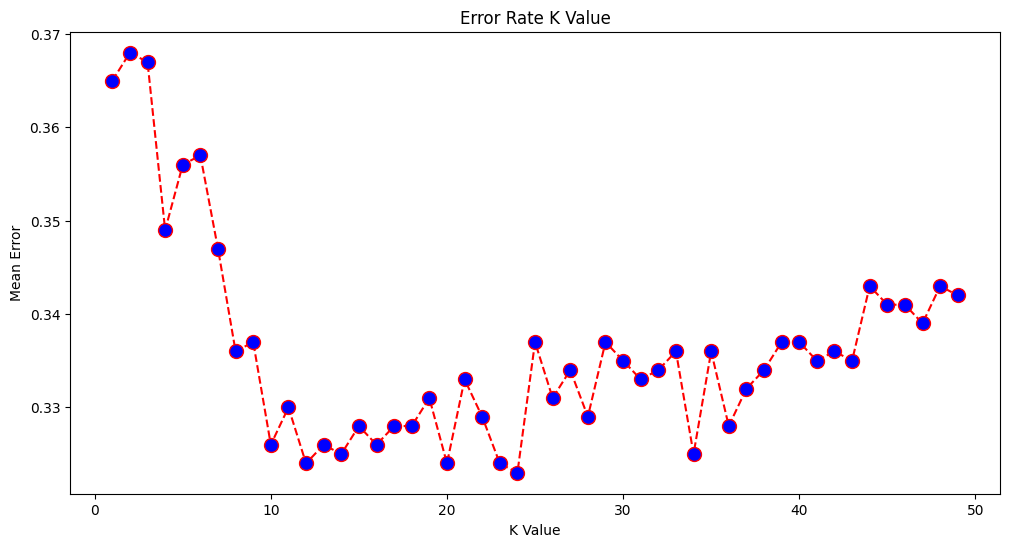

In [199]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), error_mean, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [200]:
for i in range(len(error_mean)):
    if error_mean[i] == min(error_mean):
        print(i)

23


## KNN Submission

In [201]:
knn_final = KNeighborsClassifier(n_neighbors=24)
knn_final.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=24)

In [202]:
knn_sub = knn_final.predict(test_pred)

In [203]:
knn_sub = pd.DataFrame(knn_sub, columns=['Transported'])

In [204]:
knn_sub['Transported'] = knn_sub['Transported'].astype(bool)

In [205]:
knn_sub

,Transported
0,True
1,False
2,True
3,True
4,False
...,...
4272,True
4273,False
4274,True
4275,True


In [206]:
knn_sub = pd.concat([test_df_final['PassengerId'], knn_sub], axis=1)

In [209]:
knn_sub.to_csv("knn2.csv", index=False)

# Random forest

In [210]:
from sklearn.ensemble import RandomForestClassifier

In [221]:
error_mean =[]

for i in range(1,10000,500):
    print(i)
    rfc = RandomForestClassifier(n_estimators = i)
    rfc.fit(X_train, y_train)
    pred_i = rfc.predict(X_test)
    error_mean.append(np.mean(pred_i != y_test))

1


TypeError: RandomForestClassifier.__init__() got an unexpected keyword argument 'maxdepth'

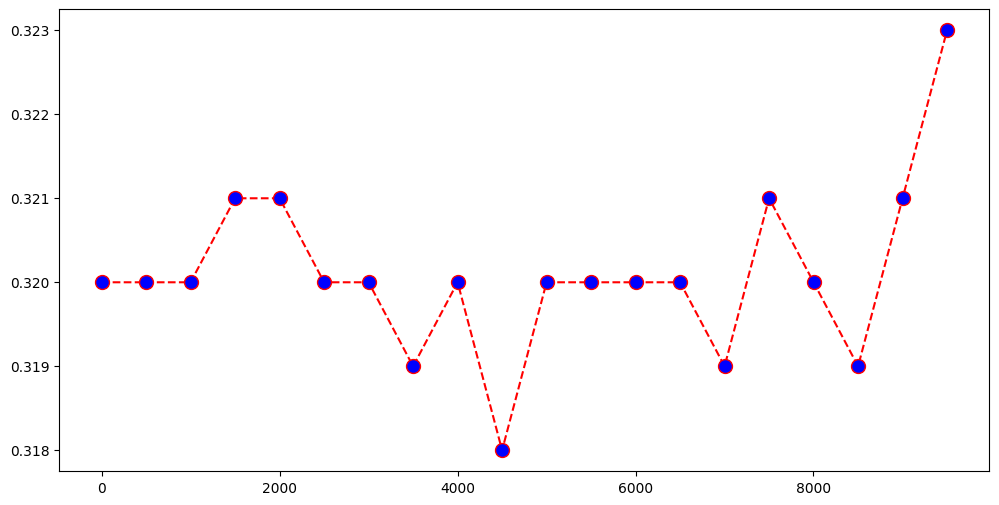

In [220]:
plt.figure(figsize=(12, 6))
plt.plot(range(1,10000,500), error_mean, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)

In [224]:
rfc_final = RandomForestClassifier(n_estimators = 4500)
rfc_final.fit(X_train, y_train)

RandomForestClassifier(n_estimators=4500)

In [225]:
rfc_sub = rfc_final.predict(test_pred)

In [226]:
rfc_sub = pd.DataFrame(rfc_sub, columns=['Transported'])

In [227]:
rfc_sub['Transported'] = rfc_sub['Transported'].astype(bool)

In [228]:
rfc_sub = pd.concat([test_df_final['PassengerId'], rfc_sub], axis=1)

In [229]:
rfc_sub.to_csv("rfc.csv", index=False)